<a href="https://colab.research.google.com/github/zakyyega/proyek-klasifikasi-laptop/blob/main/UAS_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!unzip -q "/content/drive/My Drive/dataset.zip" -d "/content/dataset_laptop"

Semua library berhasil diimpor!
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Kelas yang terdeteksi: {'ACER': 0, 'ASUS': 1, 'LOQ': 2}
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │         3,843 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,261,827 (8.63 MB)

 Trainable params: 3,843 (15.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)


Memulai proses training model...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.2592 - loss: 1.4313 - val_accuracy: 0.3667 - val_loss: 1.4049
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.3254 - loss: 1.2162 - val_accuracy: 0.3000 - val_loss: 1.4502
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4931 - loss: 1.0417 - val_accuracy: 0.4000 - val_loss: 1.2348
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4801 - loss: 1.0954 - val_accuracy: 0.4000 - val_loss: 1.2107
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.4604 - loss: 0.9884 - val_accuracy: 0.4333 - val_loss: 1.0564
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.5190 - loss: 0.9604 - val_accuracy: 0.5333 - val_loss: 0.9729
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step - accuracy: 0.6086 - loss: 0.9106 - val_accuracy: 0.5000 - val_loss: 1.0909
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5824 - loss: 0.8731 - val_accuracy: 0.5333 - val_loss: 0.9492
Epoch 9/

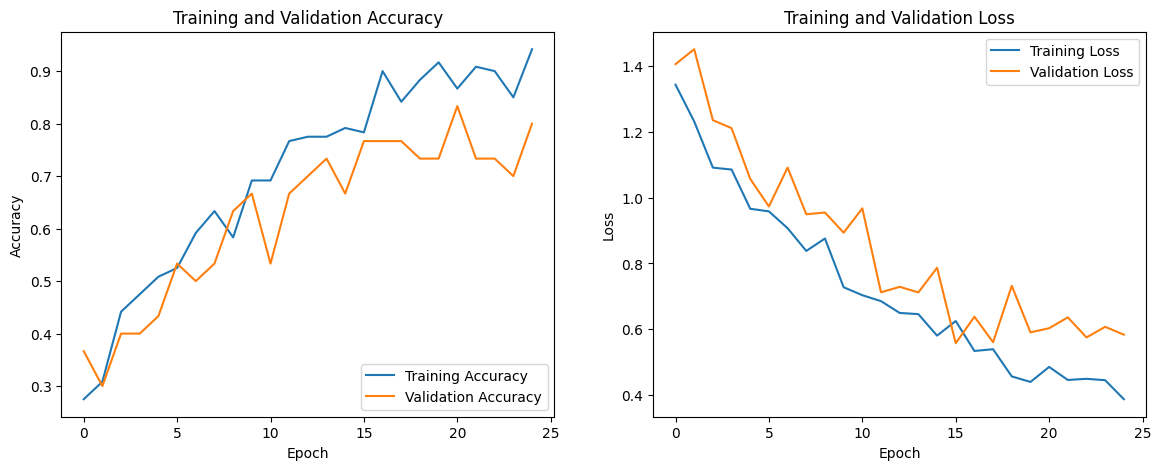


Silakan upload gambar laptop untuk diuji:


Saving IMG20250612210723.jpg to IMG20250612210723.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


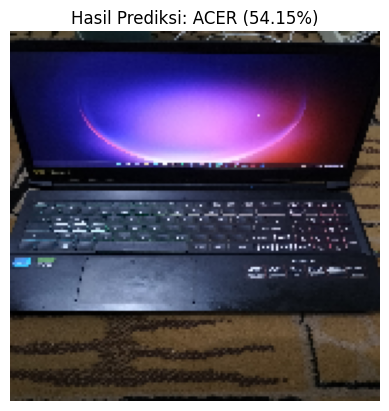

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

print("Semua library berhasil diimpor!")

base_dir = '/content/dataset_laptop'

IMG_SIZE = (160, 160)
BATCH_SIZE = 16

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

print("Kelas yang terdeteksi:", train_generator.class_indices)

num_classes = len(train_generator.class_indices)

base_model = MobileNetV2(input_shape=IMG_SIZE + (3,),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

inputs = Input(shape=IMG_SIZE + (3,))
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


print("\nMemulai proses training model...")
EPOCHS = 25

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator
)
print("Training selesai!")

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()


class_names = list(train_generator.class_indices.keys())

print("\nSilakan upload gambar laptop untuk diuji:")
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=IMG_SIZE)
  img_array = image.img_to_array(img)
  img_array = np.expand_dims(img_array, axis=0)
  img_array /= 255.0

  prediction = model.predict(img_array)

  plt.imshow(img)
  plt.axis('off')
  predicted_class = class_names[np.argmax(prediction)]
  confidence = 100 * np.max(prediction)
  plt.title(f"Hasil Prediksi: {predicted_class} ({confidence:.2f}%)")
  plt.show()